In [1]:
# Python
import pandas as pd
from prophet import Prophet


c:\Users\Duma\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('MPRIME.csv')
da = pd.read_csv('US House Price Dataset.csv')

In [3]:
df = df.drop(columns=['realtime_start', 'realtime_end'])
df.head()

,date,value
0,1949-01-01,2.0
1,1949-02-01,2.0
2,1949-03-01,2.0
3,1949-04-01,2.0
4,1949-05-01,2.0


In [4]:
da.drop(['CSUSHPISA', 'PERMIT', 'TTLCONS', 'MSACSR','UNRATE','UNRATE','PPIACO','HOUST','CNP16OV','UMCSENT','MEDCPIM158SFRBCLE', 'PSAVERT','CIVPART', 'ETOTALUSQ176N','A939RX0Q048SBEA','MSPUS','DRALACBN'], axis=1, inplace=True)
da.head()

,observation_date,FEDFUNDS,DSPIC96,DPRIME
0,1/1/2000,5.45,9799.9,8.50
1,2/1/2000,5.73,9837.9,8.73
2,3/1/2000,5.85,9864.0,8.84
3,4/1/2000,6.02,9913.7,9.00
4,5/1/2000,6.27,9954.5,9.23


In [5]:
da.drop(['DSPIC96', 'FEDFUNDS'], axis=1, inplace=True)
da.head()

,observation_date,DPRIME
0,1/1/2000,8.50
1,2/1/2000,8.73
2,3/1/2000,8.84
3,4/1/2000,9.00
4,5/1/2000,9.23


In [6]:
da['observation_date'] = pd.to_datetime(da['observation_date'], format='%m/%d/%Y')

# Выводим результат
print(da)

    observation_date  DPRIME
0         2000-01-01    8.50
1         2000-02-01    8.73
2         2000-03-01    8.84
3         2000-04-01    9.00
4         2000-05-01    9.23
..               ...     ...
278       2023-03-01    7.83
279       2023-04-01    8.00
280       2023-05-01    8.22
281       2023-06-01    8.25
282       2023-07-01    8.29

[283 rows x 2 columns]


In [7]:
da = da.rename(columns={'observation_date': 'date'})
da = da.rename(columns={'DPRIME': 'value'})
print(da)

          date  value
0   2000-01-01   8.50
1   2000-02-01   8.73
2   2000-03-01   8.84
3   2000-04-01   9.00
4   2000-05-01   9.23
..         ...    ...
278 2023-03-01   7.83
279 2023-04-01   8.00
280 2023-05-01   8.22
281 2023-06-01   8.25
282 2023-07-01   8.29

[283 rows x 2 columns]


In [8]:
df = df.iloc[:612]

print(df)

           date  value
0    1949-01-01   2.00
1    1949-02-01   2.00
2    1949-03-01   2.00
3    1949-04-01   2.00
4    1949-05-01   2.00
..          ...    ...
607  1999-08-01   8.06
608  1999-09-01   8.25
609  1999-10-01   8.25
610  1999-11-01   8.37
611  1999-12-01   8.50

[612 rows x 2 columns]


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
print(da)

          date  value
0   2000-01-01   8.50
1   2000-02-01   8.73
2   2000-03-01   8.84
3   2000-04-01   9.00
4   2000-05-01   9.23
..         ...    ...
278 2023-03-01   7.83
279 2023-04-01   8.00
280 2023-05-01   8.22
281 2023-06-01   8.25
282 2023-07-01   8.29

[283 rows x 2 columns]


In [11]:
merged_df = pd.concat([df, da])

# Печатаем объединенную таблицу
print(merged_df)

          date  value
0   1949-01-01   2.00
1   1949-02-01   2.00
2   1949-03-01   2.00
3   1949-04-01   2.00
4   1949-05-01   2.00
..         ...    ...
278 2023-03-01   7.83
279 2023-04-01   8.00
280 2023-05-01   8.22
281 2023-06-01   8.25
282 2023-07-01   8.29

[895 rows x 2 columns]


In [12]:
import pandas as pd

# Предполагается, что ваш датафрейм называется df

# Удаляем индексы слева
merged_df = merged_df.reset_index(drop=True)

# Печатаем датафрейм без индексов слева
print(merged_df)


          date  value
0   1949-01-01   2.00
1   1949-02-01   2.00
2   1949-03-01   2.00
3   1949-04-01   2.00
4   1949-05-01   2.00
..         ...    ...
890 2023-03-01   7.83
891 2023-04-01   8.00
892 2023-05-01   8.22
893 2023-06-01   8.25
894 2023-07-01   8.29

[895 rows x 2 columns]


In [13]:
merged_df.rename(columns={'date': 'ds', 'value': 'y'}, inplace=True)
merged_df.head()

,ds,y
0,1949-01-01,2.0
1,1949-02-01,2.0
2,1949-03-01,2.0
3,1949-04-01,2.0
4,1949-05-01,2.0


In [14]:
# Find the row(s) containing the problematic value
problematic_rows = merged_df[merged_df['y'] == "."]

# Print the problematic rows
print(problematic_rows)

# Depending on your data, you can either remove the problematic rows or replace the problematic value with a suitable alternative.

# For example, to remove the problematic rows:
merged_df = merged_df[merged_df['y'] != "."]

# Or to replace the problematic value with NaN:
merged_df['y'] = merged_df['y'].replace(".", float('nan'))
merged_df.head()

Empty DataFrame
Columns: [ds, y]
Index: []


,ds,y
0,1949-01-01,2.0
1,1949-02-01,2.0
2,1949-03-01,2.0
3,1949-04-01,2.0
4,1949-05-01,2.0


In [15]:
# Python
m1 = Prophet()
m1.fit(merged_df)

03:24:13 - cmdstanpy - INFO - Chain [1] start processing
03:24:13 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = m1.make_future_dataframe(periods=365)
future.tail(n=3)

,ds
1257,2024-06-28
1258,2024-06-29
1259,2024-06-30


In [17]:
forecast = m1.predict(future)
forecast.tail(n=3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1257,2024-06-28,3.587186,1.370660,6.057003,3.580048,3.592178,0.193752,0.193752,0.193752,0.193752,0.193752,0.193752,0.0,0.0,0.0,3.780937
1258,2024-06-29,3.586979,1.383281,6.200536,3.579804,3.592018,0.155292,0.155292,0.155292,0.155292,0.155292,0.155292,0.0,0.0,0.0,3.742271
1259,2024-06-30,3.586772,1.373608,6.236551,3.579561,3.591849,0.101985,0.101985,0.101985,0.101985,0.101985,0.101985,0.0,0.0,0.0,3.688757


In [18]:
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n=365)


,ds,yhat,yhat_lower,yhat_upper
895,2023-07-02,3.677001,1.320418,6.082327
896,2023-07-03,3.591693,1.368648,5.919695
897,2023-07-04,3.493871,1.220215,6.069866
898,2023-07-05,3.385064,1.033155,5.582526
899,2023-07-06,3.267147,0.852074,5.637022
...,...,...,...,...
1255,2024-06-26,3.814545,1.438730,6.071803
1256,2024-06-27,3.804867,1.394467,6.147512
1257,2024-06-28,3.780937,1.453016,6.088061
1258,2024-06-29,3.742271,1.300210,6.147248


c:\Users\Duma\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Duma\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


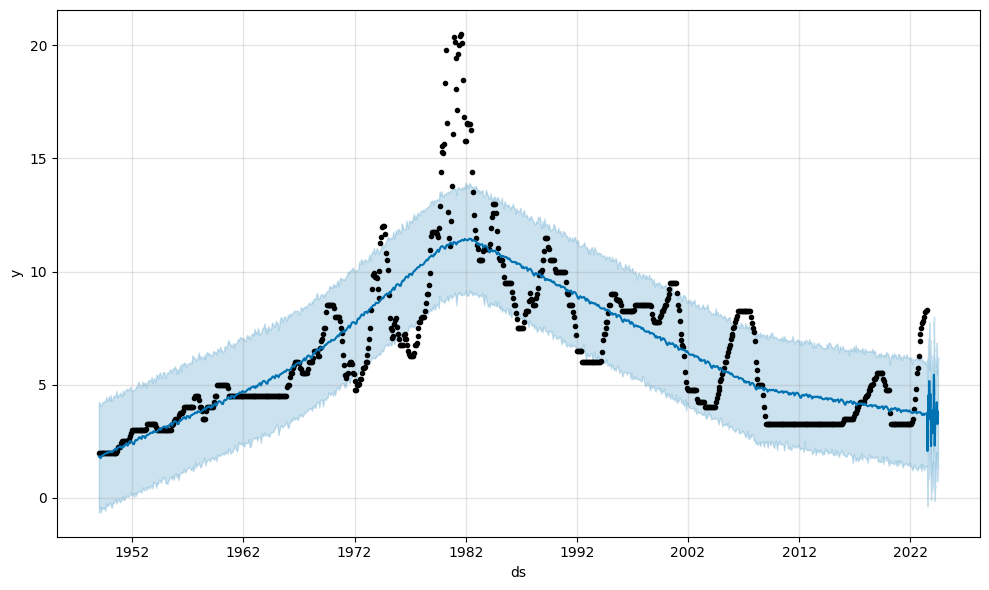

In [19]:
fig1 = m1.plot(forecast)

c:\Users\Duma\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Duma\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Duma\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

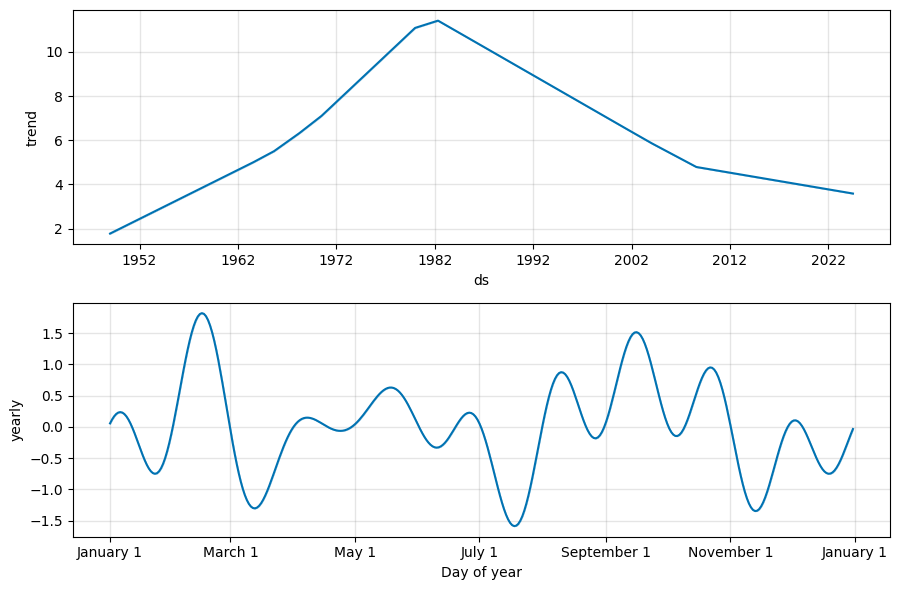

In [20]:
m1.plot_components(forecast);

In [21]:
import pandas as pd

# Отфильтровать только строки с первым днем каждого месяца
first_day_of_month = forecast[forecast['ds'].dt.day == 1]

# Записать данные в файл
first_day_of_month[['ds', 'yhat_upper']].to_csv('yhat_upper_first_day_of_month.csv', index=False)


In [22]:
# Открыть текстовый файл для записи
with open('input23.txt', 'w') as file:
    # Пройтись по каждой строке в dataframe
    for index, row in first_day_of_month.iterrows():
        # Записать в файл только значение yhat_upper и перевести строку
        file.write(str(row['yhat_upper']) + '\n')


In [23]:
# Открыть текстовый файл для чтения
with open('input23.txt', 'r') as file:
    # Прочитать все строки из файла
    lines = file.readlines()

# Получить последние 12 строк
last_12_lines = lines[-12:]

# Открыть новый текстовый файл для записи последних 12 строк с добавленными запятыми
with open('input2.txt', 'w') as file:
    # Записать последние 12 строк с запятыми в новый файл
    for line in last_12_lines:
        # Добавить запятую после каждого числа и перевод строки
        line_with_comma = line.strip() + ','
        file.write(line_with_comma)


: 